# Data visualization

In [1]:
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# Ignore this (only for notebooks):
library(repr)
options(repr.plot.width=12, repr.plot.height=6)

## 3. Now it's your turn

First, load some new data in R and have a glimpse at it:

In [3]:
tdcs_data = read_csv('https://raw.githubusercontent.com/laurafontanesi/r-seminar/master/data/tdcs.csv')


── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  RT = col_double(),
  acc_spd = col_character(),
  accuracy = col_double(),
  angle = col_double(),
  block = col_double(),
  coherence = col_double(),
  dataset = col_character(),
  id = col_character(),
  left_right = col_double(),
  subj_idx = col_double(),
  tdcs = col_character(),
  trial_NR = col_double()
)




In [4]:
glimpse(tdcs_data)

Rows: 52,800
Columns: 12
$ RT         <dbl> 799, 613, 627, 1280, 800, 760, 719, 799, 520, 1066, 480, 62…
$ acc_spd    <chr> "spd", "spd", "spd", "acc", "spd", "acc", "acc", "spd", "sp…
$ accuracy   <dbl> 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,…
$ angle      <dbl> 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180,…
$ block      <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ coherence  <dbl> 0.4171, 0.4171, 0.4171, 0.4171, 0.4171, 0.4171, 0.4171, 0.4…
$ dataset    <chr> "berkeley", "berkeley", "berkeley", "berkeley", "berkeley",…
$ id         <chr> "S1.1", "S1.1", "S1.1", "S1.1", "S1.1", "S1.1", "S1.1", "S1…
$ left_right <dbl> 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1,…
$ subj_idx   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ tdcs       <chr> "sham", "sham", "sham", "sham", "sham", "sham", "sham", "sh…
$ trial_NR   <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, …


**Task A** 

1. Show the distribution of response times (`RT`) with a **density plot**, separately by the accuracy vs. speed conditions (`acc_spd`) using different colors of the density plots per condition. Be sure to adjust the transparency so that they are both clearly visible and put appropriate axes labels and legend title.

2. Show the distribution of response times (`RT`) with a **histogram**, separately by the accuracy vs. speed conditions (`acc_spd`) using different colors of the density plots per condition. Be sure to adjust the transparency and binwidth, so that they are clearly visible and put appropriate axes labels and legend title. This time, split it furtherly by TDCS manipulation (`tdcs`) using `facet_grid()`.

3. Show the response times (`RT`) with a **violinplot**, separately by the place the data were collected (`dataset`). Split further by accuracy vs. speed conditions using colors. Add the 10%, 30%, 50%, 70%, and 90% quantiles, that are the most common in response times data analyses. Change labels appropriately.

*Question*: how do I rename the different group conditions "acc" and “spd”?

We didn’t see this in class. You can use a separate function for that: `scale_fill_discrete`. See below.

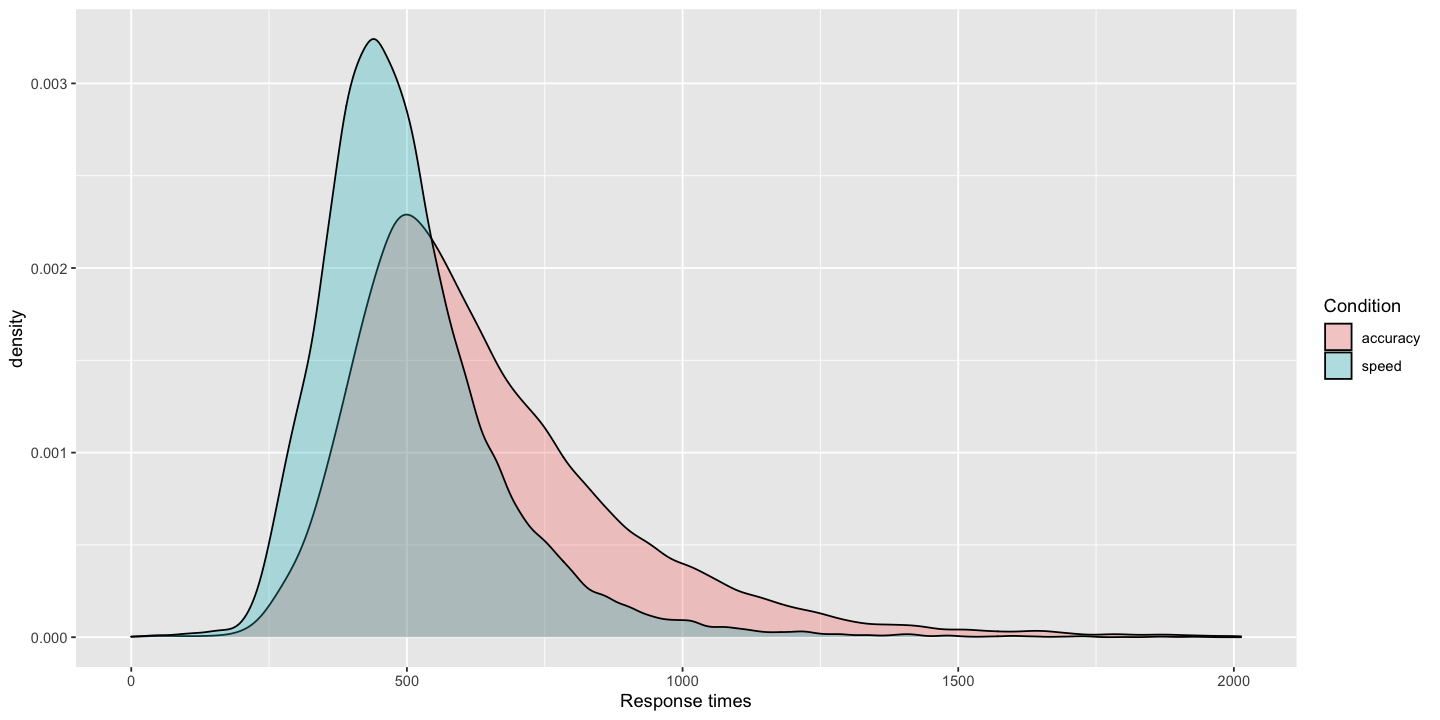

In [5]:
ggplot(data = tdcs_data, mapping = aes(x = RT, fill = acc_spd)) + 
    geom_density(alpha = .3) +
    labs(x = 'Response times', fill = 'Condition') +
    scale_fill_discrete(labels = c("accuracy", "speed"))

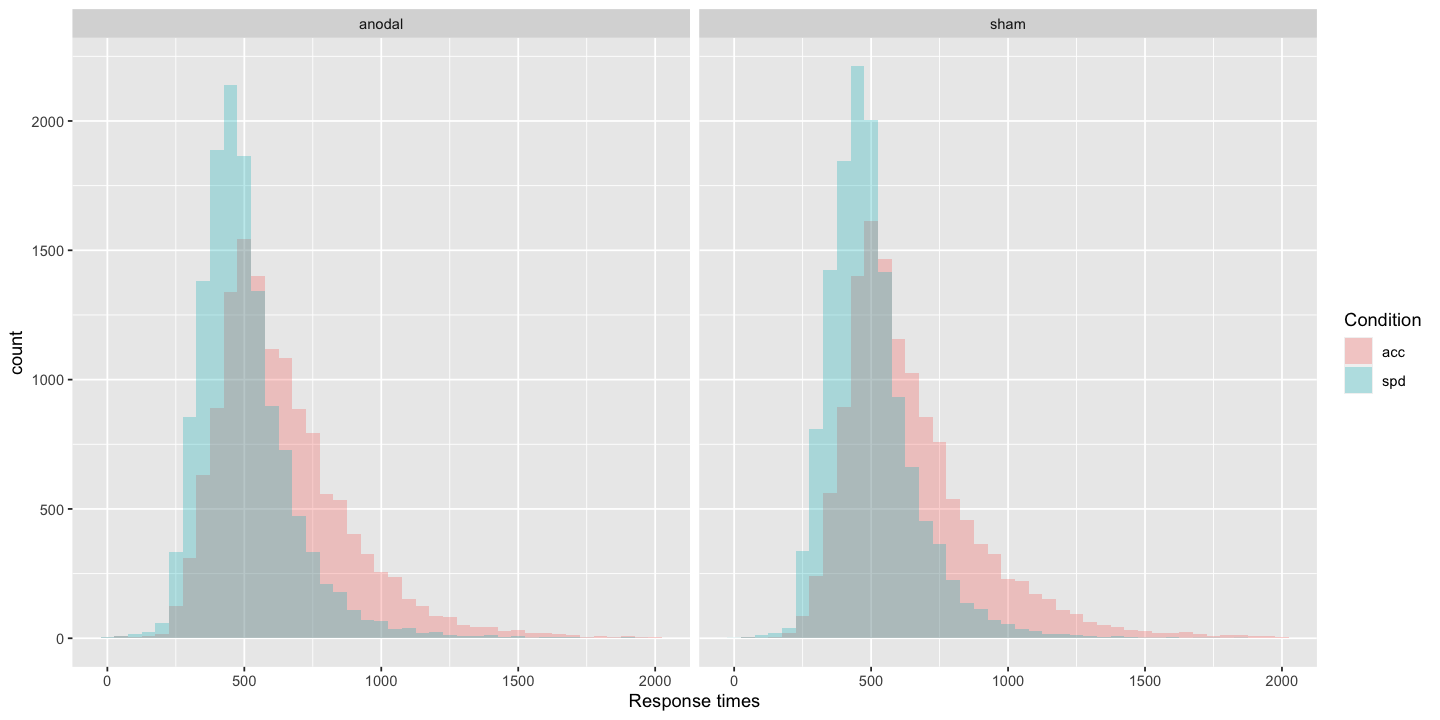

In [6]:
ggplot(data = tdcs_data, mapping = aes(x = RT, fill = acc_spd)) + 
    geom_histogram(binwidth=50, alpha = .3, position="identity") + 
    labs(x = 'Response times', fill = 'Condition') +
    facet_grid( ~ tdcs)

**Common mistakes**:

```
ggplot(data = tdcs_data, mapping = aes(x = RT, fill = acc_spd)) + 
    geom_histogram(binwidth=50, alpha = .3, position="identity") +
    labs(x = 'Response times', fill = 'Condition')
    facet_grid( ~ tdcs)
```

Here you missed a `+` at the end your `labs` function. Without it the `facet_grid` component is not added to the plot.

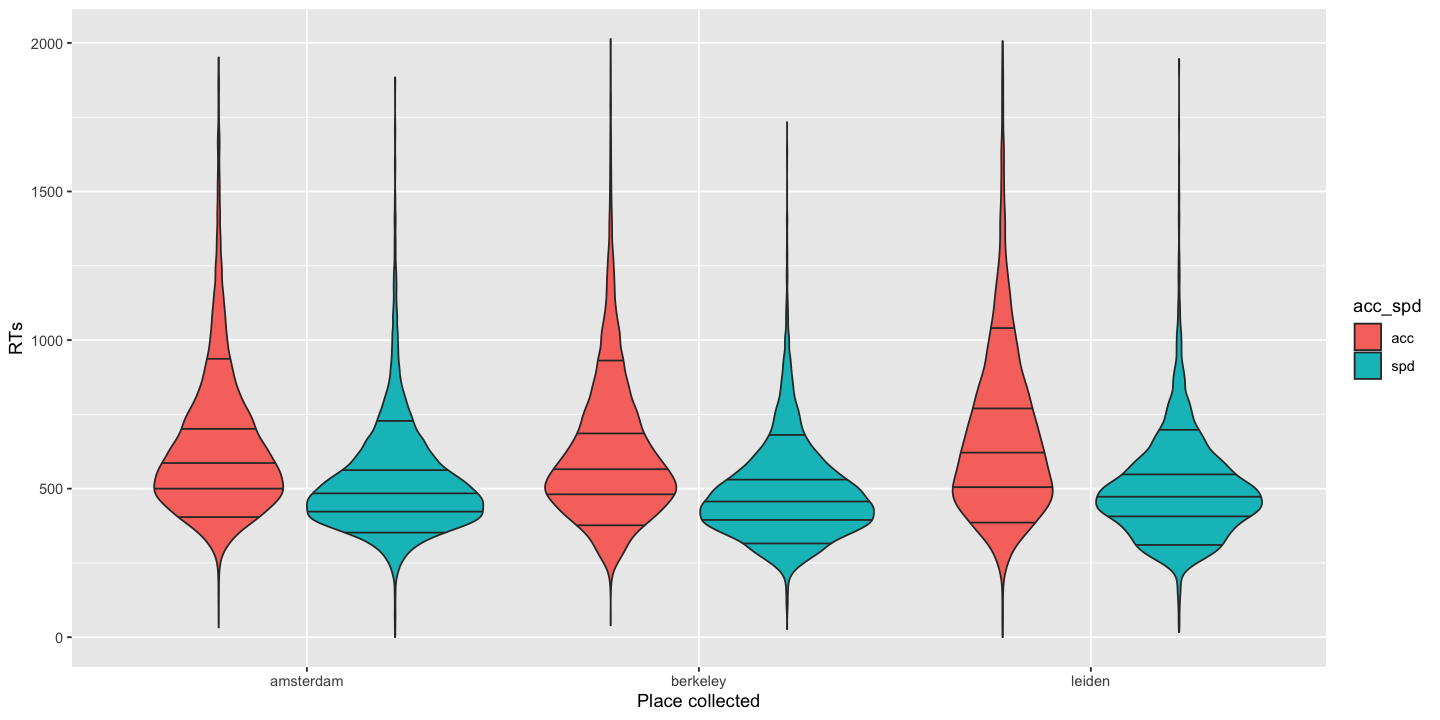

In [7]:
ggplot(data = tdcs_data, mapping = aes(x = dataset, y = RT, fill = acc_spd)) + 
    geom_violin(draw_quantiles = c(0.1, 0.3, 0.5, 0.7, 0.9)) +
    labs(x = "Place collected", y='RTs')

**Task B** 

Now, I am creating a summary of the data, where we look at mean response times and accuracy per subject, separately by coherence (how difficult the task was) and the speed vs. accuracy manipulation:

In [8]:
summary_tdcs_data = summarise(group_by(tdcs_data, id, coherence, acc_spd),
                              mean_RT=mean(RT), 
                              mean_accuracy=mean(accuracy))

glimpse(summary_tdcs_data)

`summarise()` has grouped output by 'id', 'coherence'. You can override using the `.groups` argument.



Rows: 176
Columns: 5
Groups: id, coherence [88]
$ id            <chr> "A10.1", "A10.1", "A10.2", "A10.2", "A11.1", "A11.1", "A…
$ coherence     <dbl> 0.4171, 0.4171, 0.4171, 0.4171, 0.4171, 0.4171, 0.4171, …
$ acc_spd       <chr> "acc", "spd", "acc", "spd", "acc", "spd", "acc", "spd", …
$ mean_RT       <dbl> 566.1254, 555.3443, 499.8281, 492.7937, 603.8807, 490.67…
$ mean_accuracy <dbl> 0.6237288, 0.6327869, 0.6561404, 0.6571429, 0.8771930, 0…


Using the summarized data:

1. Plot the relationship between mean response times (`mean_RT`) and mean accuracy (`mean_accuracy`) using a **scatterplot**. 

2. Use `facet_grid` to split the plot based on the speed vs. accuracy manipulation (`acc_spd`). 

3. Add the regression lines.

4. Change with appropriate plot titles and x- and y-axes labels. 

5. Add the coherence levels as color of the dots. Because coherence is a continuous variable and not categorical, you can use `scale_colour_gradient` to adjust the gradient. 

6. Change the color of the regression lines to grey.

`geom_smooth()` using formula 'y ~ x'



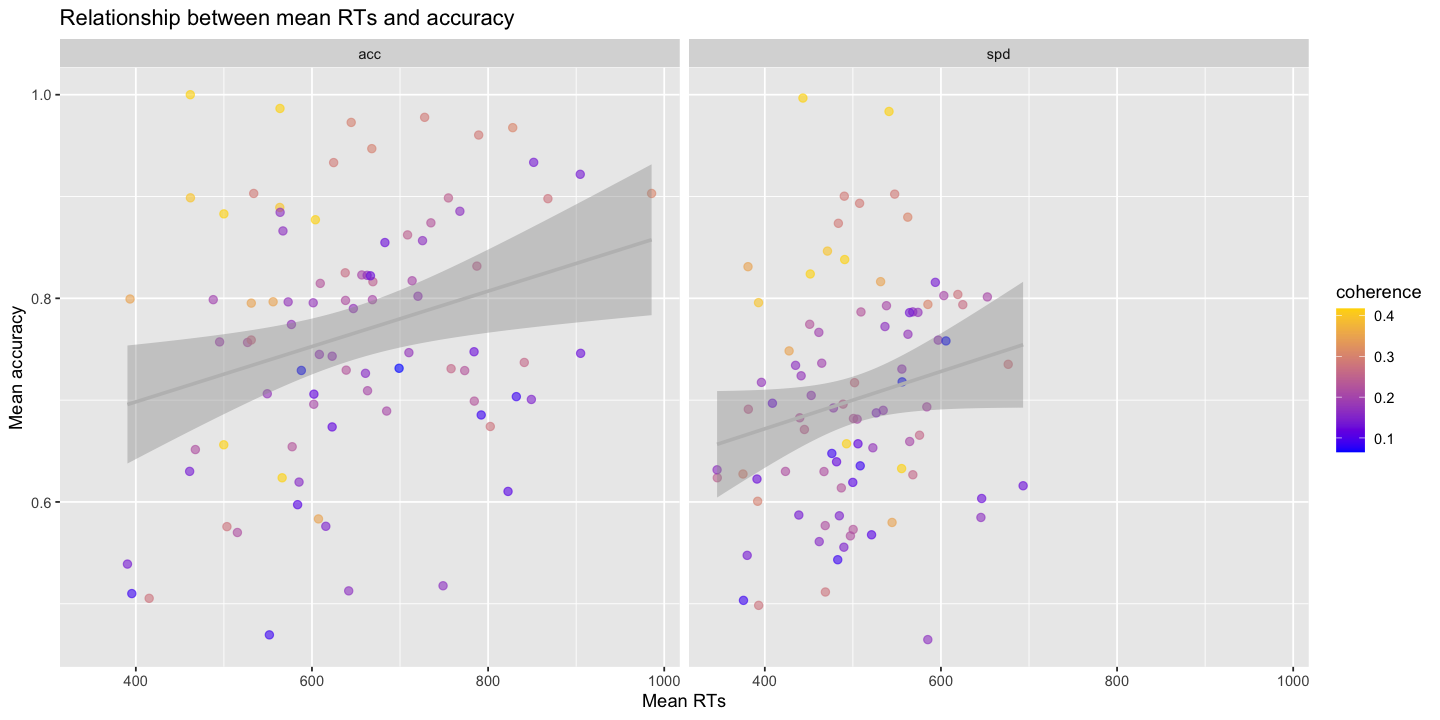

In [9]:
ggplot(data = summary_tdcs_data, mapping = aes(x = mean_RT, y = mean_accuracy, color = coherence)) + 
    geom_point(alpha = 0.6, size= 2) +
    geom_smooth(method = lm, color='grey') +
    labs(x='Mean RTs', y='Mean accuracy') +
    ggtitle("Relationship between mean RTs and accuracy") + 
    scale_colour_gradient(low = "blue", high = "gold", limits=range(summary_tdcs_data[,'coherence'])) +
    facet_grid( ~ acc_spd)

**Task C**

Using the summarized data:

1. Plot the mean `mean_accuracy`, separately by `factor(coherence)` using `stat_summary` with arguments `geom="bar"` and `position = 'dodge'`. Split further based on the accuracy vs. speed manipulation (`acc_spd`) with different colors.

2. Now add error bars representing confidence intervals and using `stat_summary` again with arguments `width=.9`, `position = 'dodge'`. Adjust the `width` argument if the error bars are not centered in each of the bars.

3. Do the same again, but:
    - using points instead of bars
    - standard errors instead of confidence intervals
    - mean RTs instead of accuracy
Note that you do not need the `position = 'dodge'` here anymore, and that you might have to adjust `size` and `width` of the error bars.

**Question**:

How to avoid overlapping labels in the x-axis?

You can do that by changing their orientation using the `theme` function. See below.

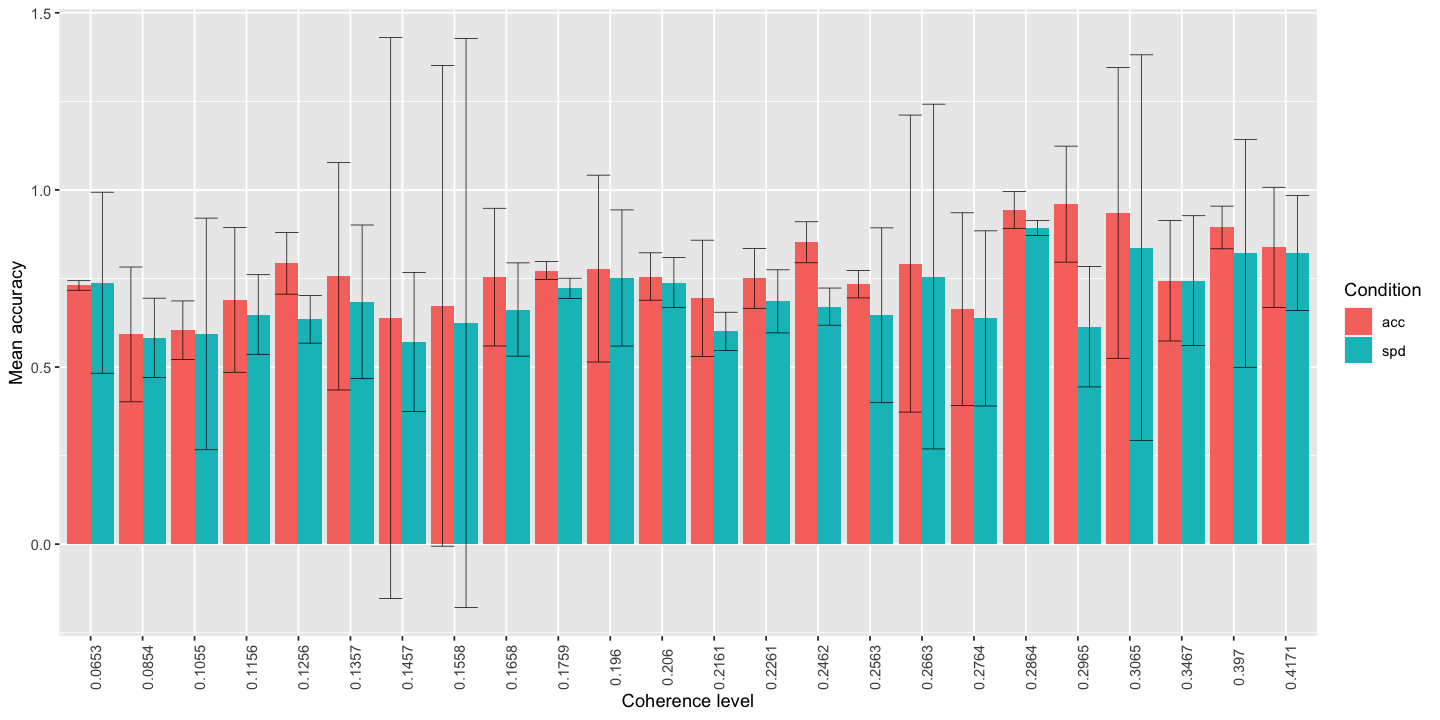

In [11]:
ggplot(data = summary_tdcs_data, mapping = aes(x = factor(coherence), y = mean_accuracy, fill=acc_spd)) +
    # stat_summary with arg "fun":
    
    # A function that returns a single number, in this case the mean worry_cont for each level of cause_recoded:
    stat_summary(fun = "mean", geom="bar", position = 'dodge') +

    # mean_cl_normal( ) is intended for use with stat_summary. It calculates
    # sample mean and lower and upper Gaussian confidence limits based on the 
    # t-distribution
    
    stat_summary(fun.data = mean_cl_normal, geom = "errorbar",  size=.2, width=.9, position = 'dodge') +
    labs(x = 'Coherence level', y = 'Mean accuracy', fill='Condition') + 
    
    # to change the orientation of the x-ticks labels:
    theme(axis.text.x = element_text(angle = 90))

**Common mistakes**:

```
ggplot(data = summary_tdcs_data, mapping = aes(x = factor(coherence), y = mean_accuracy, color = acc_spd)) +
  stat_summary(fun = "mean", geom="bar", position = “dodge”)
```

Here, you used the `color` attribute instead of the `fill` argument. That only changes the borders of the bars (not optimal).
_______________
```
ggplot(data = summary_tdcs_data, mapping = aes(x = factor(coherence), y = mean_accuracy, fill=acc_spd)) +
    stat_summary(fun.data = mean_cl_normal, geom = "errorbar", size=.2, width=.9, position = 'dodge') +
    stat_summary(fun = "mean", geom="bar", position = 'dodge') +
    labs(x = 'Coherence level', y = 'Mean accuracy', fill='Condition')
```

If you called the error bars `stat_summary(fun.data = mean_cl_normal, geom = "errorbar", ...)` **before** the bars themeselves `stat_summary(fun = "mean", geom=“bar”,…)` so you won't see the bottom part of the error bars.
_______________
```
ggplot(data = summary_tdcs_data, mapping = aes(x = mean_accuracy, y = coherence, fill = acc_spd)) + 
    facet_grid(~ acc_spd) + 
    stat_summary(fun = "mean", geom="bar") + 
    stat_summary(fun.data = mean_cl_normal, geom = "bar", size=1, width=.9) + 
    stat_summary(fun.data = mean_cl_normal, geom = "errorbar", size=1, width=.9)
```

- You don’t need to add `facet_grid(~ acc_spd)` if you are already (and correctly) splitting by colour using `fill = acc_spd`. `facet_grid` is only to split the plots in 2 columns based on a categorical variable.

- Switching x and y variables: with bar plots we want the categorical variable on the x-axis and the continuous on the y-axis.

- Calling `stat_summary` a wrong number of times:
    - `stat_summary(fun = "mean", geom="bar", ...)` : this makes bars that are as tall as the mean of `y` for each level of `x`
    - `stat_summary(fun.data = mean_cl_normal, geom = "bar", ...)` : this makes no sense because you are calculating the CI but then want to plot bars
    - `stat_summary(fun.data = mean_cl_normal, geom = "errorbar", ...)` : this is correctly calculating CI and plotting them es errorbars
_______________
```
ggplot(data = summary_tdcs_data, mapping = aes(x = factor(coherence), y = mean_accuracy, fill=acc_spd)) +
    stat_summary(fun = "mean", geom="bar", size = 3) +
    stat_summary(fun.data = mean_cl_normal(x = mean_accuracy), geom = "errorbar", size=1, width=.9) +
    labs(x = 'Education level', y = 'How worried of GW are you?’)
```

Here, `mean_cl_normal(x = mean_accuracy)` is wrong: `mean_se` and `mean_cl_normal` do not need to specify any variable in order to work. `ggplot` already “knows” what variables go on the x- and y-axis.

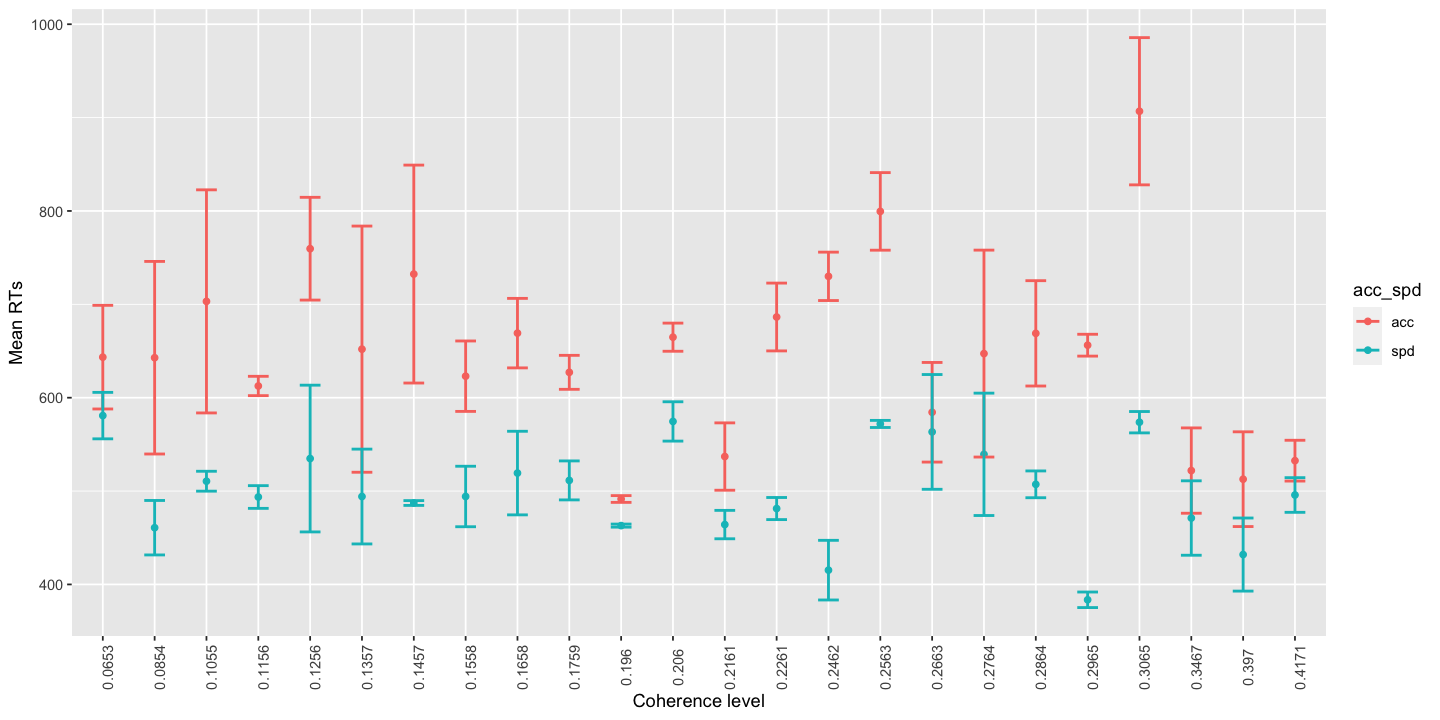

In [12]:
ggplot(data = summary_tdcs_data, mapping = aes(x = factor(coherence), y = mean_RT, color=acc_spd)) +
    # stat_summary with arg "fun":
    # A function that returns a single number, in this case the mean worry_cont for each level of cause_recoded:
    stat_summary(fun = "mean", geom="point") +

    stat_summary(fun.data = mean_se, geom = "errorbar", size=.8, width=.4) +

    labs(x = 'Coherence level', y = 'Mean RTs', fill='Condition') +

    # to change the orientation of the x-ticks labels:
    theme(axis.text.x = element_text(angle = 90))

**Common mistakes:**

When you have points instead of bars, you should remove the `position = 'dodge'` argument specification. That's only for bars, to have them next to each other and not stacked.